<a href="https://colab.research.google.com/github/MaxSMCON/MaxSMCON/blob/main/Stock_price_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020-7-11

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3MB 8.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=84cbca662edc40940fe6fc0d10b6c38f60c915ac37fb93509890f2e25d2f924b
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from IPython.display import display
variables = locals()

# Get stock data

In [ ]:
%%time
dict_df = {}
list_stock = ["TSLA", "FB", "NVDA"]
for stock in list_stock:
  dict_df[stock] = yf.download(
      stock, 
      start='2019-01-01', 
      end='2021-7-11', 
      progress=False)


CPU times: user 154 ms, sys: 13.5 ms, total: 167 ms
Wall time: 370 ms


In [ ]:
dict_df

{'FB':                   Open        High  ...   Adj Close    Volume
 Date                                ...                      
 2019-01-02  128.990005  137.509995  ...  135.679993  28146200
 2019-01-03  134.690002  137.169998  ...  131.740005  22717900
 2019-01-04  134.009995  138.000000  ...  137.949997  29002100
 2019-01-07  137.559998  138.869995  ...  138.050003  20089300
 2019-01-08  139.889999  143.139999  ...  142.529999  26263800
 ...                ...         ...  ...         ...       ...
 2021-07-02  355.100006  356.440002  ...  354.700012  11521300
 2021-07-06  356.500000  358.790009  ...  352.779999  13488500
 2021-07-07  355.260010  356.489990  ...  350.489990  14218900
 2021-07-08  345.730011  348.329987  ...  345.649994  14406500
 2021-07-09  345.320007  350.709991  ...  350.420013  13010400
 
 [635 rows x 6 columns],
 'NVDA':                   Open        High  ...   Adj Close    Volume
 Date                                ...                      
 2019-01-02  1

# Show stock data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500
...,...,...,...,...,...,...
2021-07-02,678.979980,700.000000,673.260010,678.900024,678.900024,27054500
2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800
...,...,...,...,...,...,...
2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488500
2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,130.639999,138.479996,130.050003,136.220001,135.388794,12718800
2019-01-03,133.789993,135.160004,127.690002,127.989998,127.208992,17638800
2019-01-04,130.940002,137.729996,129.699997,136.190002,135.358948,14640500
2019-01-07,138.500000,144.889999,136.429993,143.399994,142.524948,17729000
2019-01-08,146.690002,146.779999,136.899994,139.830002,138.976746,19650400
...,...,...,...,...,...,...
2021-07-02,817.609985,820.210022,811.510010,819.479980,819.479980,8569100
2021-07-06,829.500000,833.679993,814.010010,827.940002,827.940002,11167700
2021-07-07,834.140015,835.000000,813.280029,814.869995,814.869995,10460700


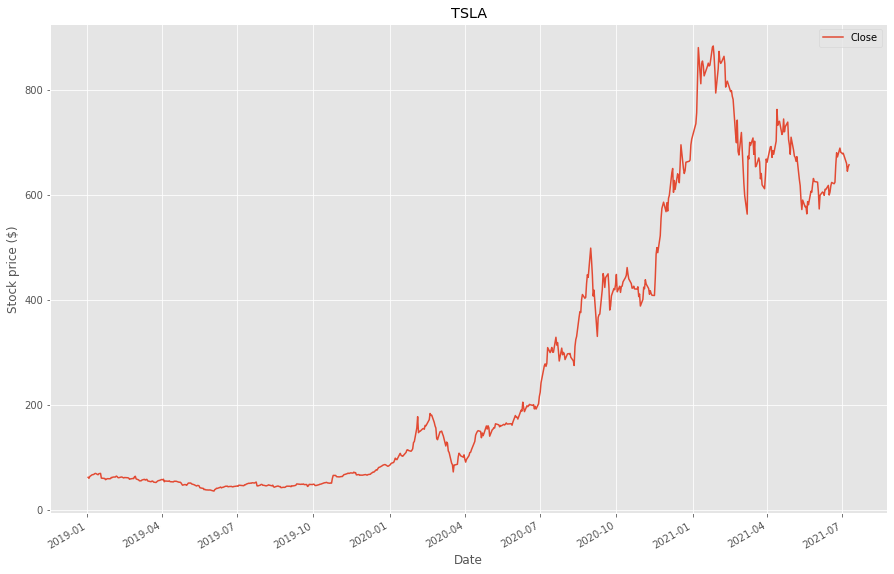

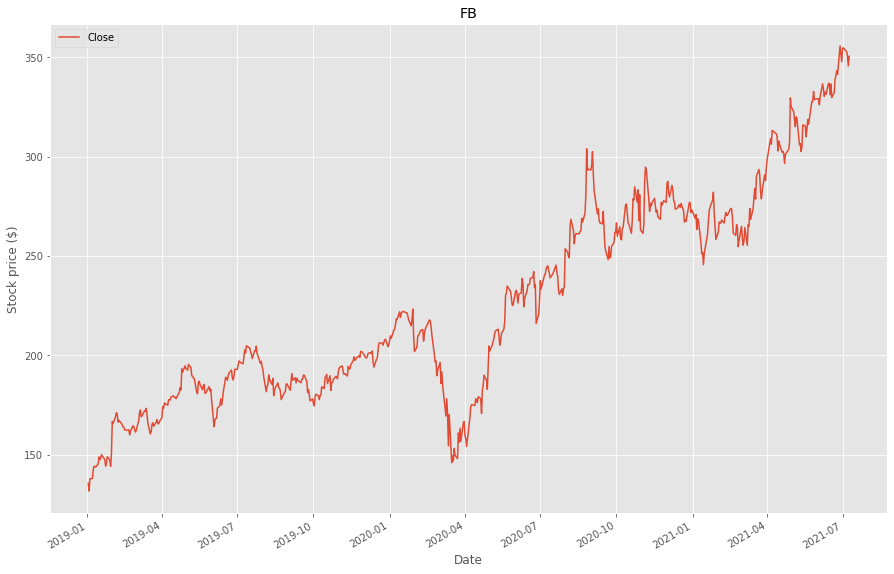

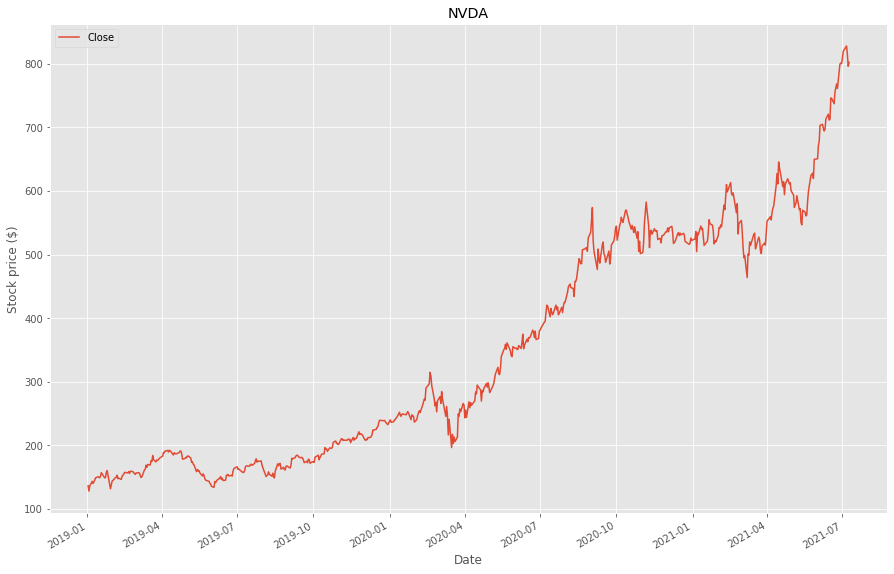

In [ ]:
for key, df in dict_df.items():
  display(df)
  ax = df[["Close"]].plot(figsize=(15,10), title=key)
  ax.set_ylabel("Stock price ($)")
  plt.gcf().set_facecolor("w")

# Auto correlation

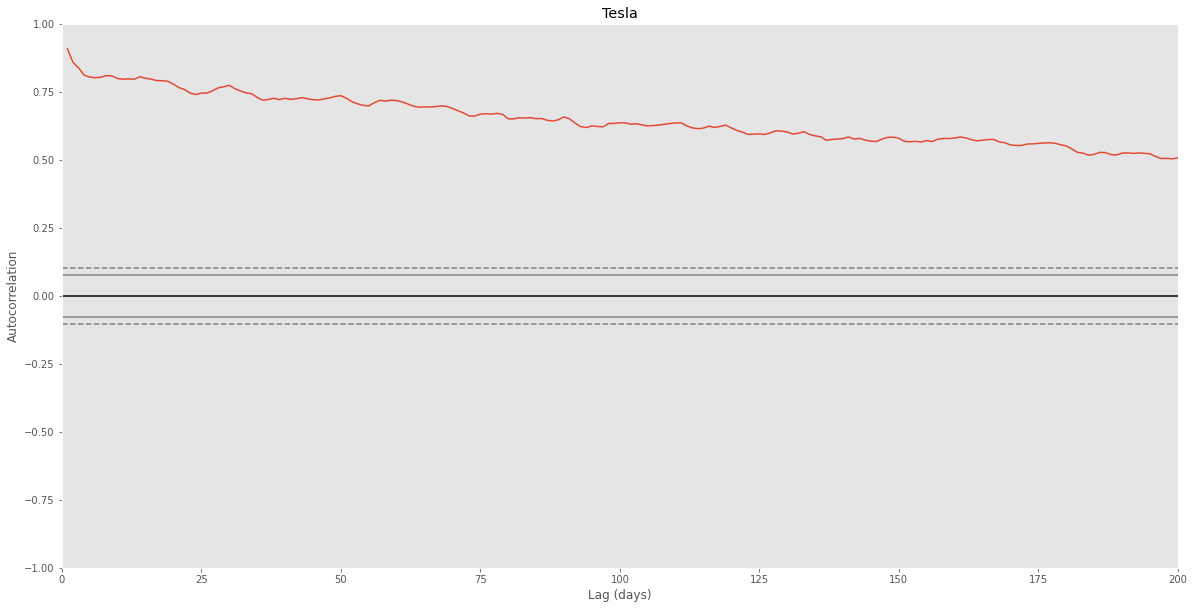

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,10))
ax = autocorrelation_plot(dict_df["TSLA"])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
plt.title("Tesla");
plt.gcf().savefig("Autocorrelation.png")

Autocorrelation subplots

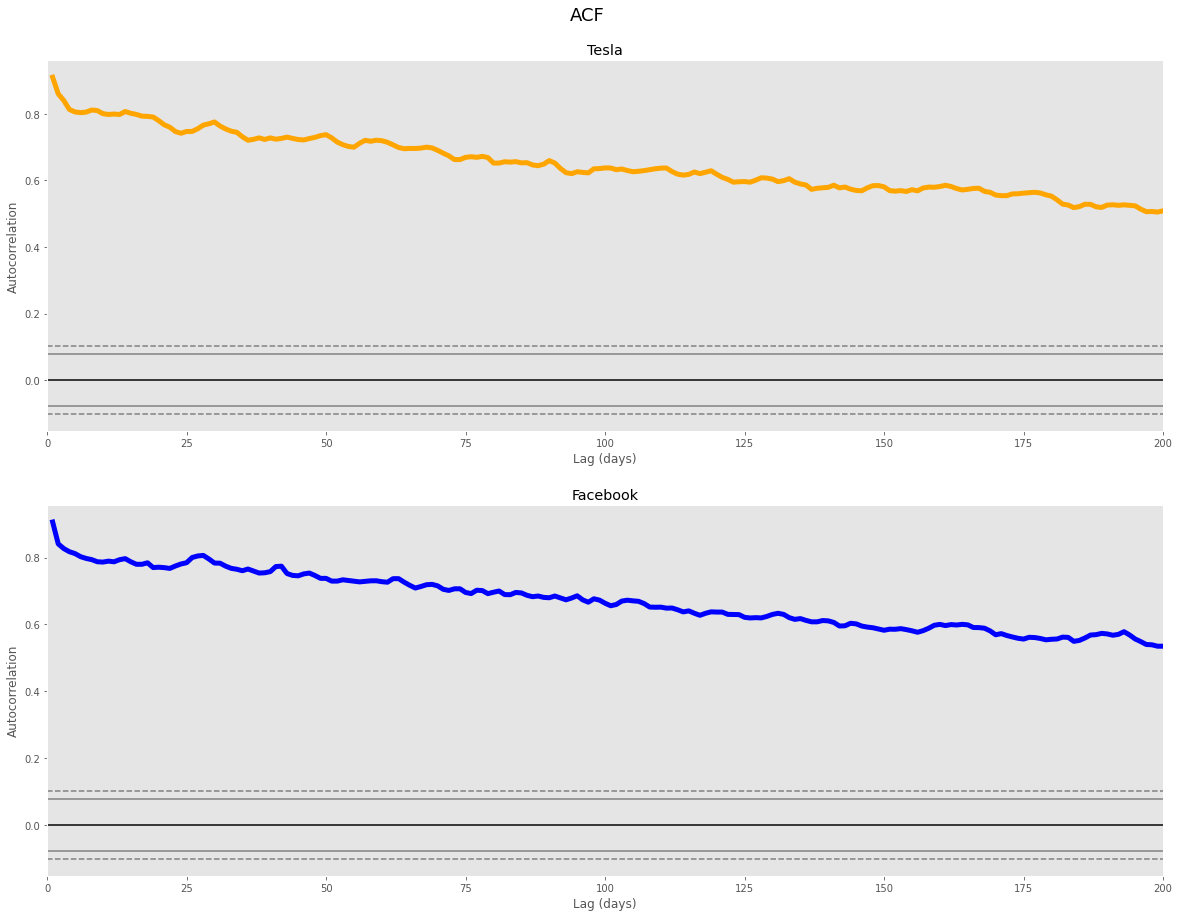

In [ ]:
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

ax = autocorrelation_plot(dict_df["TSLA"], c="orange", linewidth=5, ax=axes[0])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla");

ax = autocorrelation_plot(dict_df["FB"], c="blue", linewidth=5, ax=axes[1])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Facebook");

fig.suptitle("ACF", y=0.93, fontsize=18);
fig.savefig("Autocorrelation subplots.png")

## Exploring the properties of ACF

Reversing the time series won't affect autocorrelation

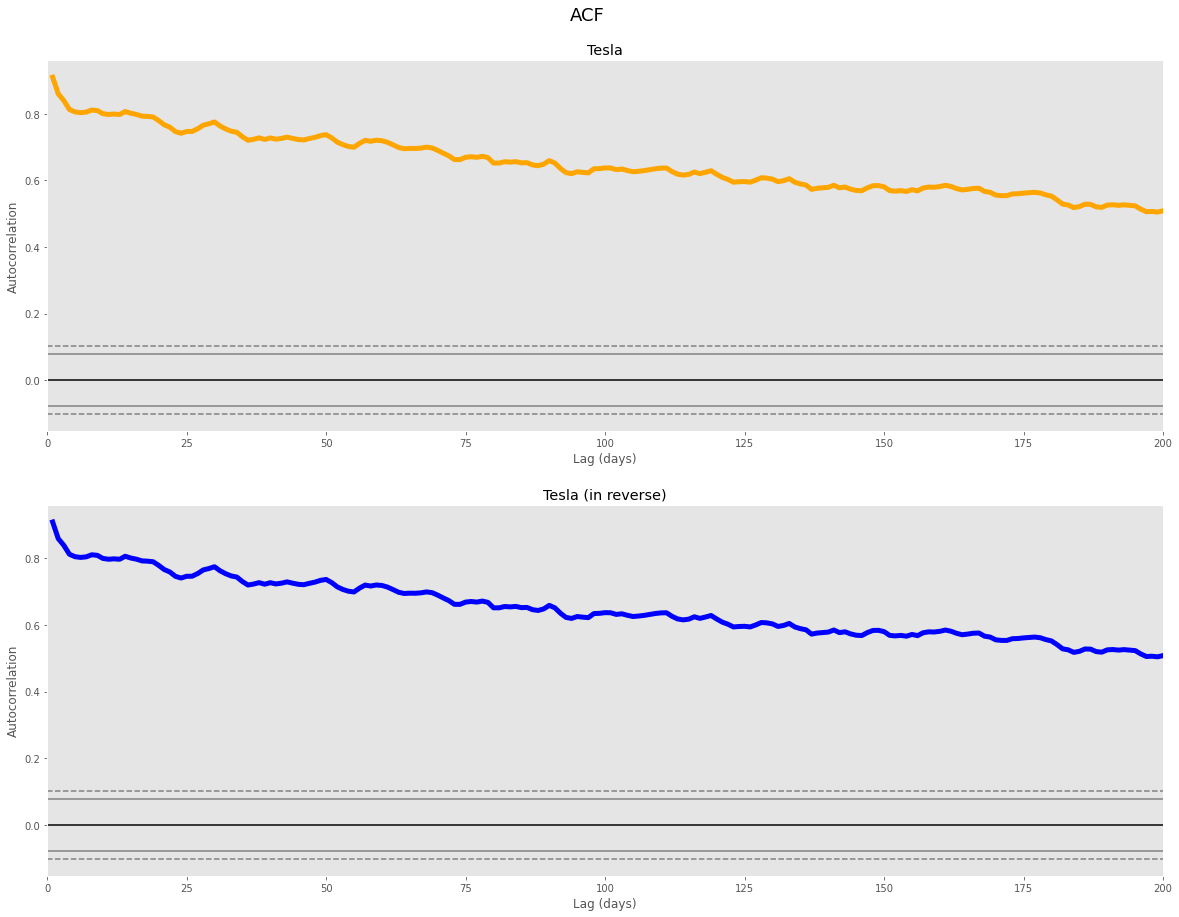

In [ ]:
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

ax = autocorrelation_plot(dict_df["TSLA"], c="orange", linewidth=5, ax=axes[0])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla");

ax = autocorrelation_plot(dict_df["TSLA"].iloc[::-1], c="blue", linewidth=5, ax=axes[1])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla (in reverse)");

fig.suptitle("ACF", y=0.93, fontsize=18);
fig.savefig("Autocorrelation subplots.png")

A subset of the time series won't have the same autcorrelation

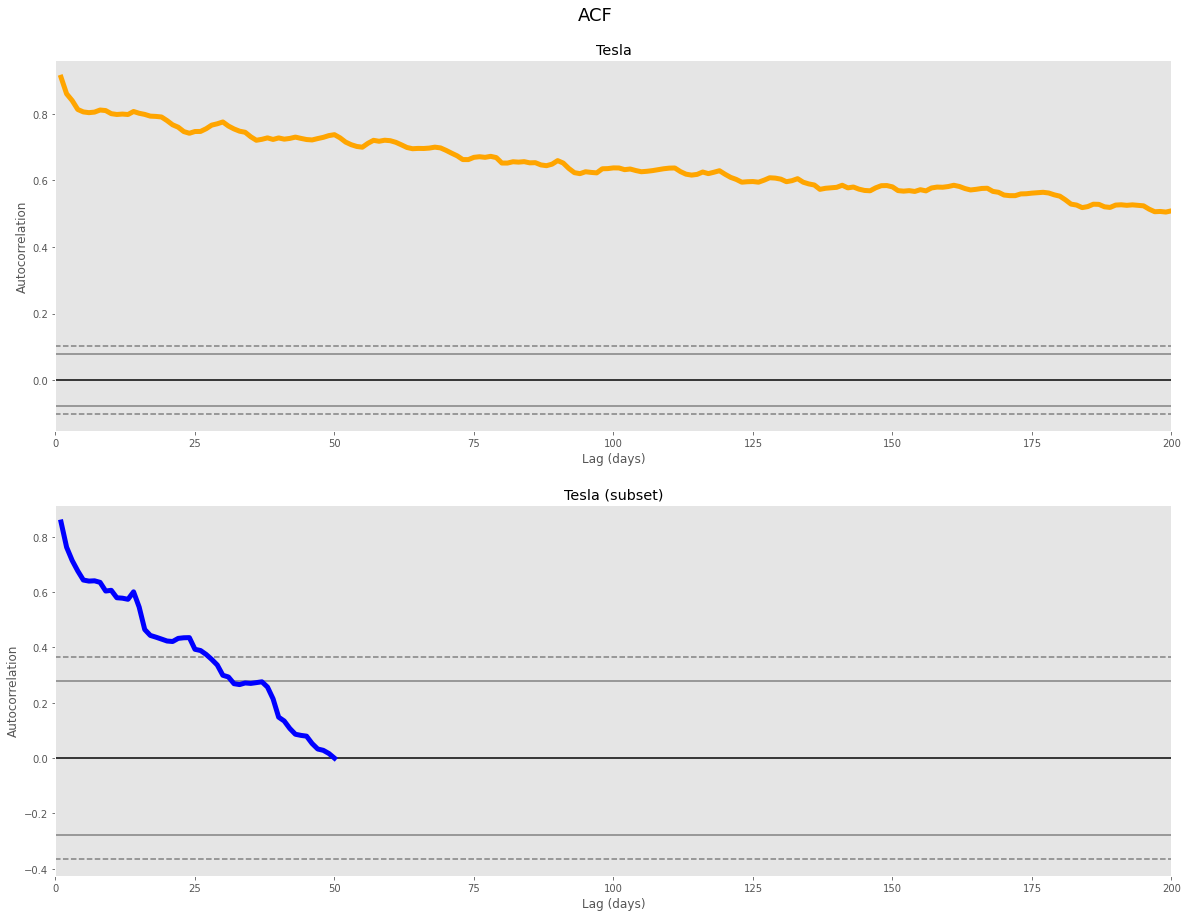

In [ ]:
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

ax = autocorrelation_plot(dict_df["TSLA"], c="orange", linewidth=5, ax=axes[0])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla");

ax = autocorrelation_plot(dict_df["TSLA"].iloc[30:80], c="blue", linewidth=5, ax=axes[1])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla (subset)");

fig.suptitle("ACF", y=0.93, fontsize=18);
fig.savefig("Autocorrelation subplots.png")

# Resampling

In [ ]:
dict_df["TSLA"].resample("M").asfreq()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,60.200001,62.312000,58.799999,61.403999,61.403999,62846000.0
2019-02-28,63.784000,64.000000,62.161999,63.976002,63.976002,52603500.0
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,48.411999,48.841999,47.400002,47.737999,47.737999,47323000.0
2019-05-31,37.020000,37.984001,36.820000,37.032001,37.032001,52033500.0
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,48.599998,49.335999,47.330002,48.321999,48.321999,45891000.0
2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,48.599998,48.796001,47.222000,48.174000,48.174000,29399000.0


In [ ]:
dict_df["TSLA"].resample("M").last()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,60.200001,62.312000,58.799999,61.403999,61.403999,62846000
2019-02-28,63.784000,64.000000,62.161999,63.976002,63.976002,52603500
2019-03-31,55.740002,56.032001,54.900002,55.972000,55.972000,29956500
2019-04-30,48.411999,48.841999,47.400002,47.737999,47.737999,47323000
2019-05-31,37.020000,37.984001,36.820000,37.032001,37.032001,52033500
2019-06-30,44.198002,45.034000,44.160000,44.692001,44.692001,34257000
2019-07-31,48.599998,49.335999,47.330002,48.321999,48.321999,45891000
2019-08-31,45.830002,46.487999,44.841999,45.122002,45.122002,46603000
2019-09-30,48.599998,48.796001,47.222000,48.174000,48.174000,29399000


In [ ]:
dict_df["TSLA"].last("1M")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,683.919983,687.989990,672.799988,677.919983,677.919983,18634500
2021-07-02,678.979980,700.000000,673.260010,678.900024,678.900024,27054500
2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300
2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18118500


⚠ Caution: 

asfreq() could contain NaN, so it won't show in the autocorrelation plot.

resample().last() will not contain NaN, so this is shown in the autocorrelation plot.

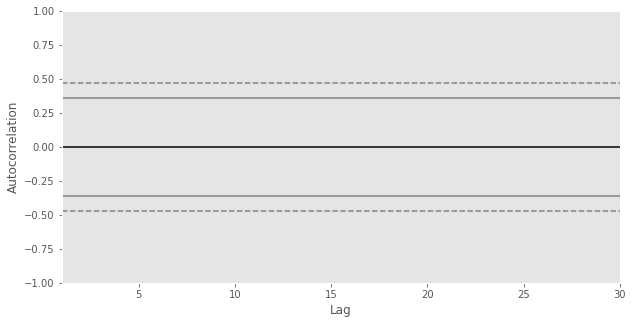

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
ax = autocorrelation_plot(dict_df["TSLA"].asfreq("M"))

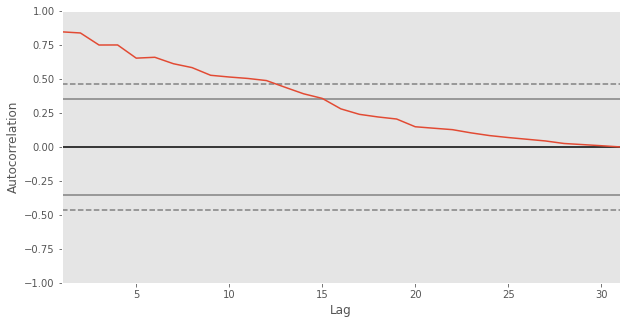

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
ax = autocorrelation_plot(dict_df["TSLA"].resample("M").last())